In [26]:
import numpy as np
import pandas as pd
import math
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=241)

In [15]:
def sigma(y):
    return 1 / (1 + np.exp(-y))

In [20]:
def plot(train, test, name_postfix):
    plt.figure()
    plt.plot(train, 'r', linewidth=3)
    plt.plot(test, 'b', linewidth=3)
    plt.legend(['train', 'test'])

1
1
0.5094757697743585
181
0.00020857611394801498
0.5
7
0.37794281961071313
250
0.0010223680763683195
0.3
11
0.3855264294288738
250
0.006887291001447363
0.2
37
0.2718312783582338
250
0.024906124380084924
0.1
52
0.3244625975110609
250
0.08936962416274087


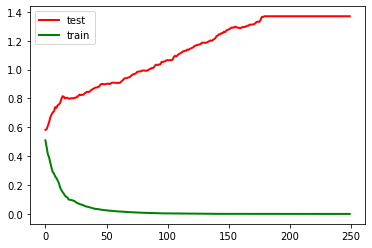

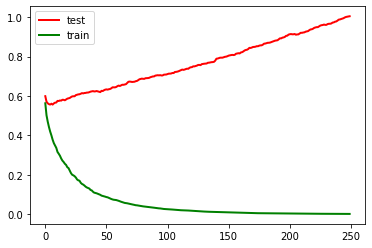

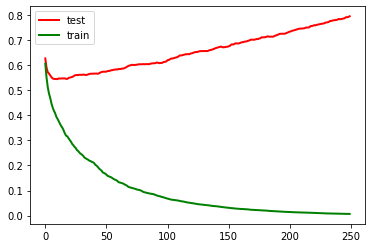

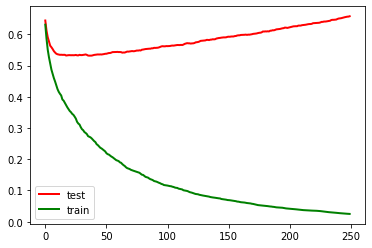

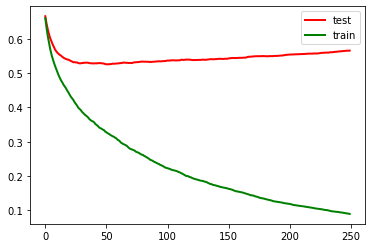

In [27]:
lr = [1, 0.5, 0.3, 0.2, 0.1]
for ll in lr:
    clf = GradientBoostingClassifier(n_estimators = 250, random_state = 241, learning_rate = ll)
    clf.fit(x_train, y_train)
    train_score = numpy.empty(len(clf.estimators_))
    test_score = numpy.empty(len(clf.estimators_))
    for i, x in enumerate(clf.staged_decision_function(x_train)):
        temp = []
        for xx in x:
            temp.append(1 / (1 + math.exp((-1) * xx)))
        train_score[i] = log_loss(y_train, temp)

    for i, x in enumerate(clf.staged_decision_function(x_test)):
        temp = []
        for xx in x:
            temp.append(1 / (1 + math.exp((-1) * xx)))
        test_score[i] = log_loss(y_test, temp)
    print (ll)
    print (numpy.argmin(test_score) + 1)
    print (train_score[numpy.argmin(test_score)])
    print (numpy.argmin(train_score) + 1)
    print (train_score[numpy.argmin(train_score)])
    plt.figure()
    plt.plot(test_score, 'r', linewidth = 2)
    plt.plot(train_score, 'g', linewidth = 2)
    plt.legend(['test', 'train'])

In [29]:
clf_rf = RandomForestClassifier(n_estimators = 37, random_state = 241)
clf_rf.fit(x_train, y_train)
y_proba_rf = clf_rf.predict_proba(x_test)
print(log_loss(y_test, y_proba_rf))

0.5410941951182815
